<h1> Import Libraries </h1>

In [55]:
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score
import time


<h1> Explore The Data </h1>

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0.5, 1.0, 'Class Distribution')

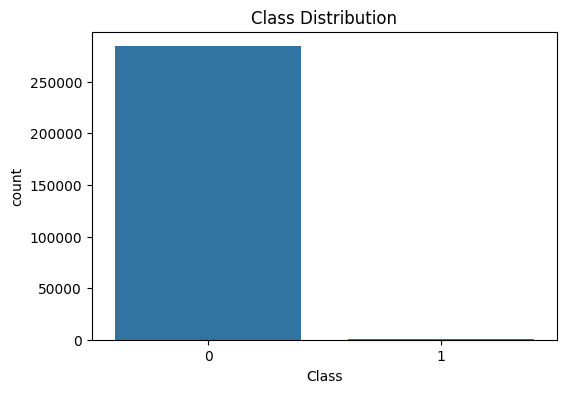

In [ ]:
# Visualizing the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")

In [12]:
# Printing the class distribution
print(df['Class'].value_counts())                # counts
print("**************************************")
print(df['Class'].value_counts(normalize=True))  # percentage

Class
0    284315
1       492
Name: count, dtype: int64
**************************************
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [15]:
X = df.drop('Class', axis=1)
y = df['Class']

<h1>🔹 Approach 1: Treat it as an Anomaly Detection Problem</h1>

In [35]:
# Initialize the Isolation Forest model
iso = IsolationForest(
    n_estimators=300,       # number of trees
    max_samples='auto',     # number of samples per tree
    contamination=0.05,     # expected proportion of anomalies
    max_features=1.0,       # fraction of features used per tree
    random_state=42)

In [36]:
# Fit the model and predict
Start_isolation_time = time.time()
iso.fit(X)
End_isolation_time = time.time()
print(f"Isolation Forest training time: {End_isolation_time - Start_isolation_time:.4f} seconds")

# Predictions: 1 = normal, -1 = anomaly
y_pred = iso.predict(X)
y_pred = np.where(y_pred == 1, 0, 1)  # Convert 1 to 0 (normal), -1 to 1 (anomaly)

Isolation Forest training time: 5.2028 seconds


In [37]:
# Evaluation Isolation Forest
confusion_matrix(y, y_pred)

array([[270493,  13822],
       [    73,    419]], dtype=int64)

In [38]:
# Detailed classification report for Isolation Forest
print(classification_report(y, y_pred, target_names=['Normal', 'Fraud'], digits=4))

              precision    recall  f1-score   support

      Normal     0.9997    0.9514    0.9750    284315
       Fraud     0.0294    0.8516    0.0569       492

    accuracy                         0.9512    284807
   macro avg     0.5146    0.9015    0.5159    284807
weighted avg     0.9981    0.9512    0.9734    284807



In [39]:
# in fraued detection, we care more about recall (minimizing false negatives) than precision.
# so this model is doing a good job in identifying fraudulent transactions.
# let's try another algorithm - One Class SVM

In [40]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train only on normal class (y=0)
X_train_normal = X_train[y_train == 0]

In [41]:
# Initialize the One-Class SVM model
oc_svm = OneClassSVM(kernel="rbf", nu=0.1, gamma='scale')

In [42]:
# fit the model and predict
Start_ocsvm_time = time.time()
oc_svm.fit(X_train_normal)
End_ocsvm_time = time.time()
print(f"One-Class SVM training time: {End_ocsvm_time - Start_ocsvm_time:.4f} seconds")

# Predictions: -1 = anomaly, 1 = normal
y_pred = oc_svm.predict(X_test)
y_pred = np.where(y_pred == -1, 1, 0)  # Map 1=fraud, 0=normal → to match labels

One-Class SVM training time: 502.9435 seconds


In [43]:
# Evaluation One-Class SVM
confusion_matrix(y_test, y_pred)

array([[76644,  8651],
       [  127,    21]], dtype=int64)

In [44]:
# Detailed classification report for One-Class SVM
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud'], digits=4))

              precision    recall  f1-score   support

      Normal     0.9983    0.8986    0.9458     85295
       Fraud     0.0024    0.1419    0.0048       148

    accuracy                         0.8973     85443
   macro avg     0.5004    0.5202    0.4753     85443
weighted avg     0.9966    0.8973    0.9442     85443



In [ ]:
# one-class SVM is too slow and not very effective for this dataset.

<h1> 🔹 Approach 2: Use Resampling (Supervised Learning) </h1>

In [ ]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
# Define the models 
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),

    "KNN": KNeighborsClassifier(n_neighbors=5),

    # RandomForest can handle imbalance via class_weight='balanced', so SMOTE is optional
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    
    # XGBoost can handle imbalance via scale_pos_weight, so SMOTE is optional
    "XGBoost": XGBClassifier(n_estimators=200, scale_pos_weight=(np.sum(y_train==0)/np.sum(y_train==1)), use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [49]:
# apply strafied k-fold cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [57]:
# Choose the best model based on cross-validation recall score for the fraud class
for name, model in models.items():
    print("************************************************")
    print(f"model {model}")

    if name in ["LogisticRegression", "KNN"]:
        # Create a pipeline with SMOTE and the model
        pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
            
    else:
        # No SMOTE for RandomForest and XGBoost
        pipeline = Pipeline([
            ('model', model)
        ])
            
    # Cross-validation scores
    recall_fraud_scorer = make_scorer(recall_score, pos_label=1)     # focus on recall for the fraud class only 
        
    start_time = time.time()
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=recall_fraud_scorer, n_jobs=-1)
    end_time = time.time()

    print(f"{name} training time: {end_time - start_time:.4f} seconds")
    print(f"{name} - CV Recall (Fraud): {np.mean(scores):.4f} ± {np.std(scores):.4f}")
        

************************************************
model LogisticRegression(max_iter=1000)
LogisticRegression training time: 94.9704 seconds
LogisticRegression - CV Recall (Fraud): 0.9098 ± 0.0197
************************************************
model KNeighborsClassifier()
KNN training time: 135.8758 seconds
KNN - CV Recall (Fraud): 0.5115 ± 0.0502
************************************************
model RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)
RandomForest training time: 264.4596 seconds
RandomForest - CV Recall (Fraud): 0.7674 ± 0.0243
************************************************
model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
            

In [58]:
# KNN is too bad, RandomForest has low recall and is slow
# XGBoost is good [time and recall], LogisticRegression has better recall but is slower
# So we will test LogisticRegression and XGBoost on the test set

# Fit and evaluate model_1: Logistic Regression with SMOTE
model_1 = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('LogisticRegression', LogisticRegression(max_iter=1000))
]) 

model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud'], digits=4))

[[84327   968]
 [   22   126]]
              precision    recall  f1-score   support

      Normal     0.9997    0.9887    0.9942     85295
       Fraud     0.1152    0.8514    0.2029       148

    accuracy                         0.9884     85443
   macro avg     0.5575    0.9200    0.5985     85443
weighted avg     0.9982    0.9884    0.9928     85443



c:\Users\IT\anaconda3\envs\AUSAM\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Fit and evaluate model_2: XGBoost
model_2 = XGBClassifier(n_estimators=200, scale_pos_weight=(np.sum(y_train==0)/np.sum(y_train==1)), eval_metric='logloss', random_state=42)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud'], digits=4))

[[85281    14]
 [   31   117]]
              precision    recall  f1-score   support

      Normal     0.9996    0.9998    0.9997     85295
       Fraud     0.8931    0.7905    0.8387       148

    accuracy                         0.9995     85443
   macro avg     0.9464    0.8952    0.9192     85443
weighted avg     0.9995    0.9995    0.9995     85443




# Fraud Detection Approaches – Summary

We experimented with **two different approaches** to tackle the imbalanced fraud detection problem:

---

## **Approach 1: Anomaly Detection**

* **Model Used:** Isolation Forest
* **Key Points:**

  * Treated fraud cases as **anomalies**.
  * Trained only on the **normal class**.
* **Performance:**

  * **Recall (Fraud):** 0.85 ✅
  * **Training Time:** \~5 seconds ⏱
* **Remarks:**

  * Fast training and good recall, making it suitable for **real-time anomaly detection** scenarios.

---

## **Approach 2: Classification with Oversampling**

* **Models Tested:** Logistic Regression, XGBoost, Random Forest, KNN, etc.

* **Key Techniques:**

  * Used **SMOTE** to increase the minority class (fraud) in training.
  * Evaluated models using **cross-validation focusing on recall for fraud**.

* **Best Models:**

| Model               | Recall (Fraud) | Training Time | Notes                                                                    |
| ------------------- | -------------- | ------------- | ------------------------------------------------------------------------ |
| Logistic Regression | 0.85           | \~30 seconds  | SMOTE applied; high recall; slower due to oversampling                   |
| XGBoost             | 0.79           | \~2.5 seconds | No SMOTE needed; handles imbalance via `scale_pos_weight`; fast training |

* **Remarks:**

  * Logistic Regression achieved the **highest recall** but took longer to train due to SMOTE.
  * XGBoost was **faster**, still with good recall, suitable when **training speed is important**.

---

### ✅ **Conclusion**

* **Anomaly detection (Isolation Forest)** is **fast** and gives **good recall** without oversampling.
* **Classification with SMOTE** allows more **control over minority class detection**, but may increase training time.
* Choice depends on **trade-off between speed and flexibility**:

  * **Real-time monitoring:** Isolation Forest
  * **Thorough offline analysis with higher recall tuning:** Logistic Regression with SMOTE